<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">


# Logistic Regression Practice


## Introduction
- Data from the UCI Machine Learning Repository: [bank data](https://archive.ics.uci.edu/ml/datasets/Bank+Marketing)
- **Goal**: Predict whether a customer will purchase a bank product marketed over the phone
- `bank.csv` is already in our repo, so there is no need to download the data from the UCI website

#### Read the data into Pandas

In [122]:
import pandas as pd
bank = pd.read_csv('../assets/data/bank.csv')
pd.set_option('max_columns', None) 
bank.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,30,blue-collar,married,basic.9y,no,yes,no,cellular,may,fri,487,2,999,0,nonexistent,-1.8,92.893,-46.2,1.313,5099.1,0
1,39,services,single,high.school,no,no,no,telephone,may,fri,346,4,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,0
2,25,services,married,high.school,no,yes,no,telephone,jun,wed,227,1,999,0,nonexistent,1.4,94.465,-41.8,4.962,5228.1,0
3,38,services,married,basic.9y,no,unknown,unknown,telephone,jun,fri,17,3,999,0,nonexistent,1.4,94.465,-41.8,4.959,5228.1,0
4,47,admin.,married,university.degree,no,yes,no,cellular,nov,mon,58,1,999,0,nonexistent,-0.1,93.200,-42.0,4.191,5195.8,0


#### 1: What is the distribution of our target?

In [123]:
bank['y'].value_counts()/bank['y'].count()

0    0.890507
1    0.109493
Name: y, dtype: float64

#### 2: You know the drill... explore the data!

- choose 3-4 features to put in your model
- do exploratory data analysis on those features

In [124]:
# bank.isnull().sum() # There are no null values for any feature

In [125]:
# Initial hypothesis is that age, job and outcome of previous marketing campaign would be good predictors
# Turns out the majority of poutcome were nonexistent, so this would be a bad predictor
# Also after running bank["default"].value_counts() it turns out default only has 1 case of true
columns_of_interest = ['age', 'job', 'education']

In [126]:
bank[columns_of_interest].describe(include="all")

,age,job,education
count,4119.000000,4119,4119
unique,NaN,12,8
top,NaN,admin.,university.degree
freq,NaN,1012,1264
mean,40.113620,NaN,NaN
std,10.313362,NaN,NaN
min,18.000000,NaN,NaN
25%,32.000000,NaN,NaN
50%,38.000000,NaN,NaN
75%,47.000000,NaN,NaN


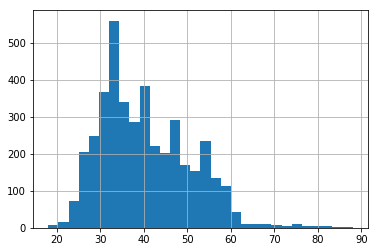

In [127]:
# Have a look to see how the age is distributed
import matplotlib.pyplot as plt
%matplotlib inline
bank["age"].hist(bins=30);

In [128]:
# Have a look at the data
bank["job"].value_counts()

admin.           1012
blue-collar       884
technician        691
services          393
management        324
retired           166
self-employed     159
entrepreneur      148
unemployed        111
housemaid         110
student            82
unknown            39
Name: job, dtype: int64

In [129]:
# drop unknown job type
bank = bank[bank["job"] != "unknown"]

In [130]:
# Have a look at the data
bank["education"].value_counts()

university.degree      1261
high.school             915
basic.9y                568
professional.course     533
basic.4y                421
basic.6y                227
unknown                 154
illiterate                1
Name: education, dtype: int64

In [131]:
# drop unknown education type
bank = bank[bank["education"] != "unknown"]

#### 3: Do a train-test split

In [132]:
# get dummy variables
X = pd.get_dummies(bank[columns_of_interest], columns=['job', 'education'], drop_first=True)
y = bank["y"]
X.head(3)

,age,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,education_basic.6y,education_basic.9y,education_high.school,education_illiterate,education_professional.course,education_university.degree
0,30,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
1,39,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0
2,25,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0


In [136]:
# Train - test - split your data, including stratify to improve the accuracy
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.25,
                                                    random_state=42,
                                                    stratify=y)

# Have a look at the split of the training and test data
from IPython.display import display
display(y_test.value_counts() / len(y_test))
display(y_train.value_counts() / len(y_train))

0    0.892057
1    0.107943
Name: y, dtype: float64

0    0.892323
1    0.107677
Name: y, dtype: float64

#### 4: Fit a logistic regression model on your training set

In [137]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(X_train, y_train)

print(lr.intercept_, lr.coef_)

[-2.65437353] [[ 0.01420389 -0.4920094  -1.11431841 -0.27314728 -0.57955475  0.25931255
  -0.64823124 -0.45480267  0.84728952 -0.383761    0.38386214  0.02150078
  -0.02315541  0.11153322 -0.08378298  0.43958994  0.39256932]]


In [138]:
from sklearn.metrics import confusion_matrix

print(confusion_matrix(y_test, y_pred))

[[876   0]
 [106   0]]


#### 5: What is the interpretation of the coefficients?

If you used a categorical feature, calculate the log odds for the baseline, and the log odds for one of its other values.

What is the difference in log odds, and therefore the difference in probability?

In [109]:
X_train.head(1)

,age,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,education_basic.6y,education_basic.9y,education_high.school,education_illiterate,education_professional.course,education_university.degree
3440,35,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0


In [110]:
# For a 35 year old technician, who has done a professional course
log_odds_y_1 = lr.intercept_ + 35*lr.coef_[0][0] + lr.coef_[0][9] + lr.coef_[0][15]

# For a 35 year old entrepreneur with a university degree
log_odds_y_2 = lr.intercept_ + 35*lr.coef_[0][0] + lr.coef_[0][2] + lr.coef_[0][16]

print(log_odds_y_1, log_odds_y_2)

[-2.10140836] [-2.8789864]


In [111]:
def odds_to_p(odds):
    return odds / (1 + odds)

In [113]:
# I.e. the Technician has a 10% chance of buying, whereas the entrepreneur only has a 5% chance
import numpy as np
print(odds_to_p(np.exp(log_odds_y_1)),
      odds_to_p(np.exp(log_odds_y_2)))

[0.10896001] [0.05320217]


In [114]:
# Note how predict function outputs both the positive and negative probabilities - but this is the same as manually working it out above
y_train_p = lr.predict_proba(X_train)
y_train_p[0]

array([0.89103999, 0.10896001])

#### 6: BONUS - model improvement

Try some things to improve your score:

- Use more/fewer/different features
- Use grid search to find the right value of `C` for regularisation
    - You could also try both `l1` and `l2` regularisation
- Use cross-validation to evaluate the logistic regression model with your chosen features. Look at different metrics:
    - [Classification/Accuracy Error](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html)
    - [The Confusion Matrix](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html)
    - [Precision, recall, and area under a curve (AUC)](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_auc_score.html#sklearn.metrics.roc_auc_score)
- Obtain the test error using your best model

In [115]:
# Apply regularisation to the LogisticRegression model. Note there are 2 types, l1 and l2
lr_l1_penalty = LogisticRegression(penalty="l1", C=0.1)
lr_l2_penalty = LogisticRegression(penalty="l2", C=0.1)

lr_l1_penalty.fit(X_train, y_train)
lr_l2_penalty.fit(X_train, y_train);

In [116]:
# Look at how regularisation changes the intercept (and also coefficients - not shown)
print(lr.intercept_)
print(lr_l1_penalty.intercept_)
print(lr_l2_penalty.intercept_)

[-2.65437353]
[-2.2019917]
[-1.49045537]


In [117]:
# Look at the predictions based on the new model with regularisation included
y_pred_l1_p = lr_l1_penalty.predict_proba(X_test)
y_pred_l1_p[0]

array([0.90629957, 0.09370043])

In [144]:
from sklearn.model_selection import GridSearchCV

grid = GridSearchCV(estimator=LogisticRegression(penalty="l2"),
                    param_grid={"C": [0.1, 0.2, 0.5]},
                    scoring="accuracy",
                    cv=3)

grid.fit(X_train, y_train)
print(grid.best_score_)
print(grid.best_params_)

0.8923233695652174
{'C': 0.1}


In [139]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

y_pred = lr_l1_penalty.predict(X_test)

acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
print(f"Accuracy: {acc}\tPrecision: {prec}\tRecall: {rec}\tF-1: {f1}")

Accuracy: 0.8920570264765784	Precision: 0.0	Recall: 0.0	F-1: 0.0


/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


In [120]:
from sklearn.metrics import confusion_matrix

print(confusion_matrix(y_test, y_pred))

[[876   0]
 [106   0]]


In [121]:
from sklearn.metrics import roc_auc_score

auc = roc_auc_score(y_test, y_pred)
print(f"AUC: {auc}")

AUC: 0.5
